<a href="https://colab.research.google.com/github/Creatrohit9/2-CAPSTON-ROHIT-BHADAURIYA-NYC-TAXI-TRIP-TIME-PRIDICTION/blob/main/NYC_TAXI_TRIP_TIME_PRIDICTION_ROHITBHADAURIYA_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

First we mount the drive then 

In [313]:
!pip install klib

In [314]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [315]:
#importing all libraries for performing EDA & machine learning work 
import pandas as pd
import klib          # used for one shot visualization of all the features
import numpy as np
from numpy import math
import seaborn as sns
import xgboost                                              # extreme gradient boosting 
from sklearn.preprocessing import MinMaxScaler              # scaling the value of features
from sklearn.model_selection import train_test_split # used for dividing the feature in train and tested
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')


In [316]:
#given the path for the csv file
taxi_df=pd.read_csv('/content/drive/MyDrive/2-CAPSTON PROJECT SUPERWISED ML REGRESSION/Copy of NYC Taxi Data.csv')

# **Exploratory Data Analysis for Machine learning model**

In [317]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [318]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


We can see the outlier from the features and clear that passenger count have outlier

In [319]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


obsevation about the coumns :
* **Dropoff date time ** and **Pickup date time** are in string formate so we need to convert it into date time formate.
* **Store and fwg flag** is a catogorical variable.

In [320]:
taxi_df.shape

(1458644, 11)

In [321]:
#corr relation data for the observation
klib.corr_mat(taxi_df)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.00,0.29,0.01,0.00,0.00,0.00,0.02
passenger_count,0.29,1.00,0.00,-0.01,-0.00,-0.00,0.01
pickup_longitude,0.01,0.00,1.00,0.02,0.78,0.10,0.03
pickup_latitude,0.00,-0.01,0.02,1.00,0.11,0.49,-0.03
dropoff_longitude,0.00,-0.00,0.78,0.11,1.00,0.12,0.01
dropoff_latitude,0.00,-0.00,0.10,0.49,0.12,1.00,-0.02
trip_duration,0.02,0.01,0.03,-0.03,0.01,-0.02,1.00


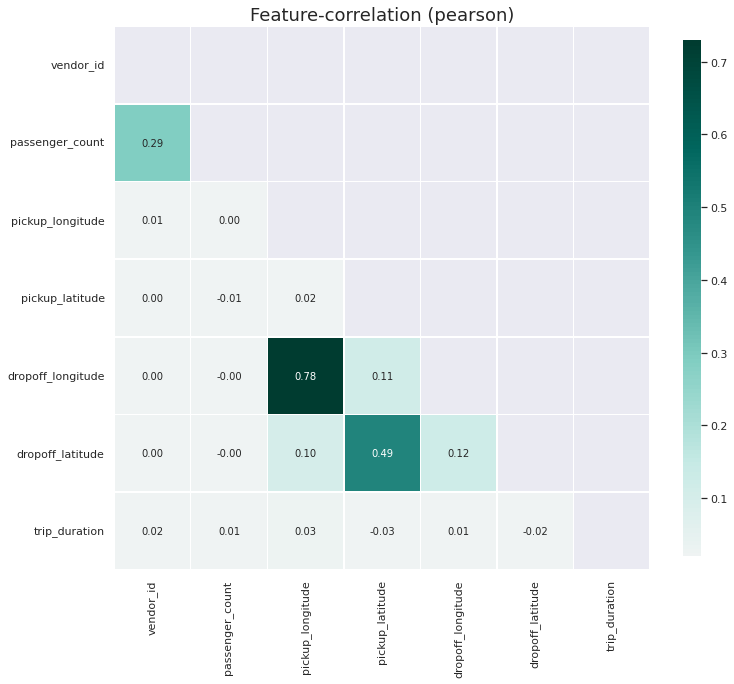

In [322]:
# corr relation plot give us great intution about the feature relation
klib.corr_plot(taxi_df)

In [323]:
#for all the missing value
klib.missingval_plot(taxi_df)

No missing values found in the dataset.


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


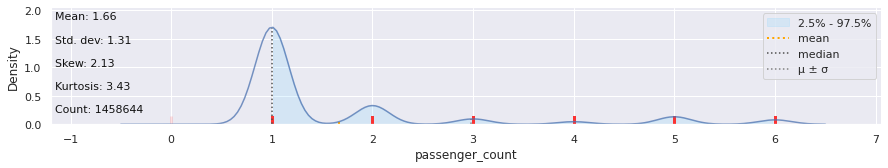

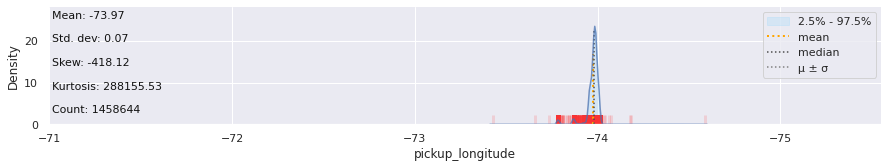

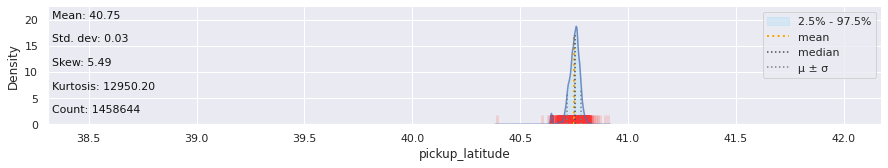

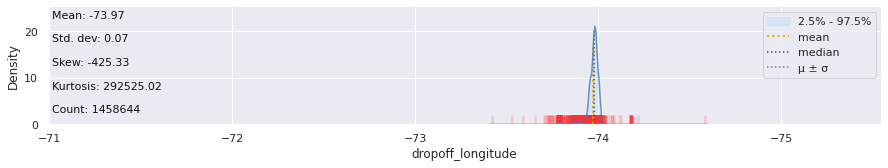

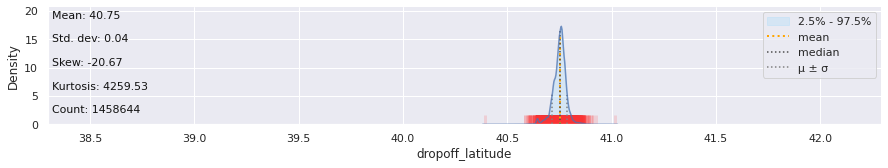

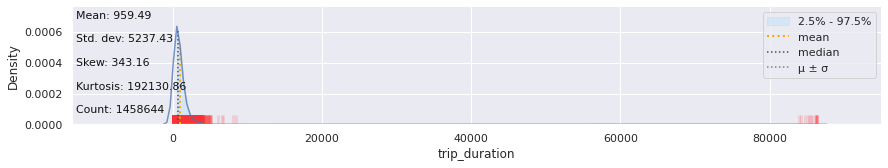

In [324]:
#dist plot for the diffrent features  distribution
klib.dist_plot(taxi_df)

GridSpec(6, 4)

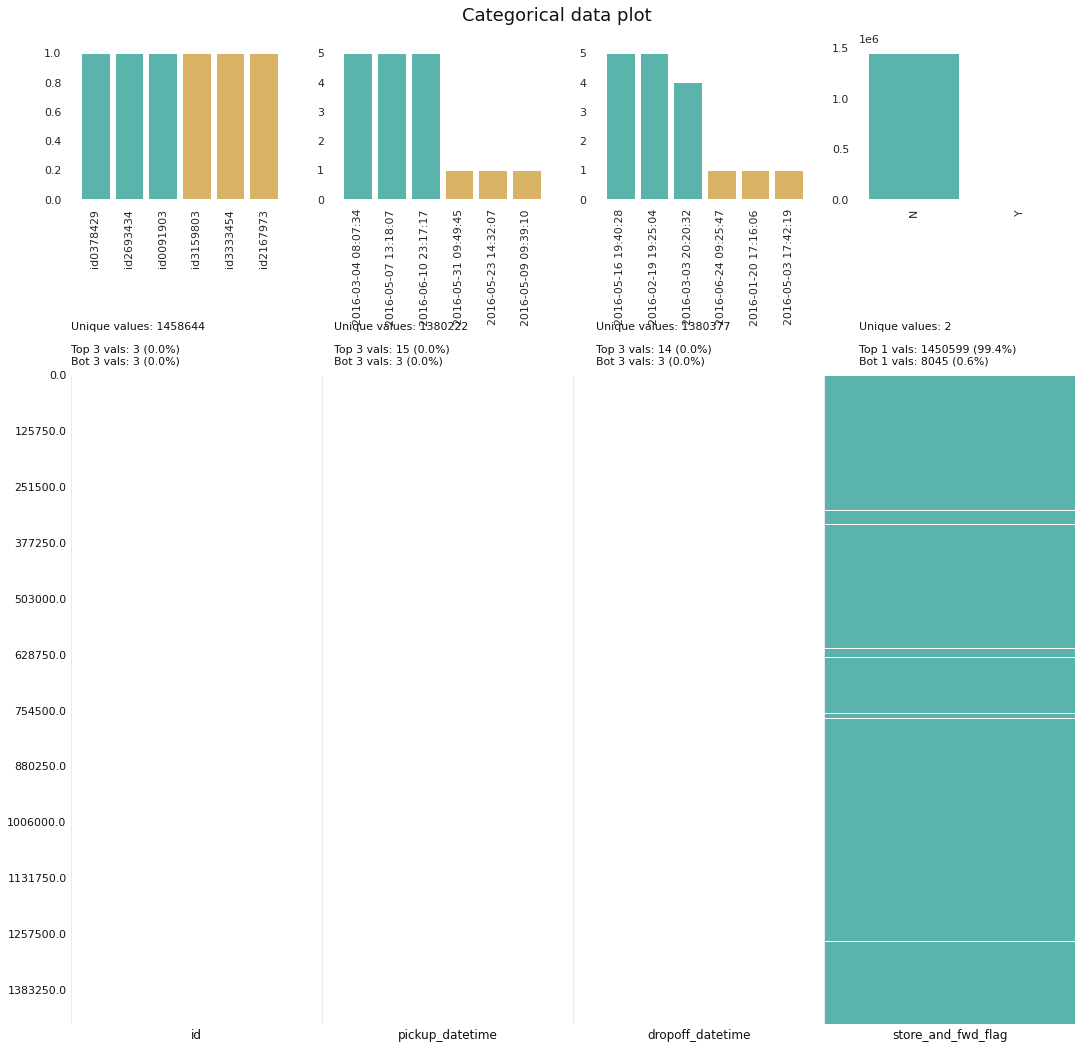

In [325]:
klib.cat_plot(taxi_df)

In [326]:
# remove all the duplicate value
taxi_df.drop_duplicates(inplace=True)

In [327]:
taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [328]:
# for all the 0 passenger count row
taxi_df[taxi_df['passenger_count']==0].count

<bound method DataFrame.count of                 id  vendor_id  ... store_and_fwd_flag trip_duration
62744    id3917283          2  ...                  N         85901
136519   id3645383          2  ...                  N             4
194288   id2840829          2  ...                  N           155
217765   id3762593          1  ...                  N          2251
263809   id2154895          1  ...                  N             8
278290   id0796773          1  ...                  N             9
301600   id2091096          2  ...                  N          2072
303133   id0414625          2  ...                  N            15
337809   id0271506          2  ...                  N            41
375972   id3176865          2  ...                  N            15
383407   id3493269          2  ...                  N             7
412172   id2247129          2  ...                  N          1556
415843   id1794493          2  ...                  N            22
437735   id2891

In [329]:
taxi_df=taxi_df[taxi_df['passenger_count']!=0]

In [330]:
taxi_df['pickup_datetime'][0]

'2016-03-14 17:24:55'

converting the string date time to date time formate and save it in row

In [331]:
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])

In [332]:
taxi_df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


now we look at the target variable that is trip time ,which have outlier so lets plot a graph for it.

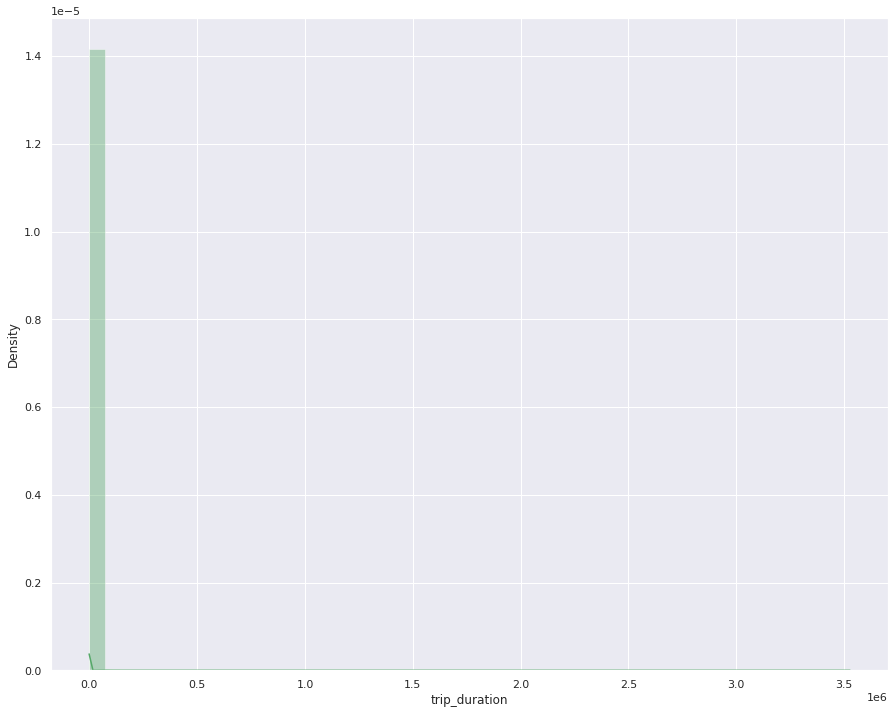

In [333]:
plt.figure(figsize=(15,12))
sns.distplot(taxi_df['trip_duration'],color='G')

WE USE LOG TRANSFORMATION FOR NORMALIZED THE DATA BEACAUSE IT IS 

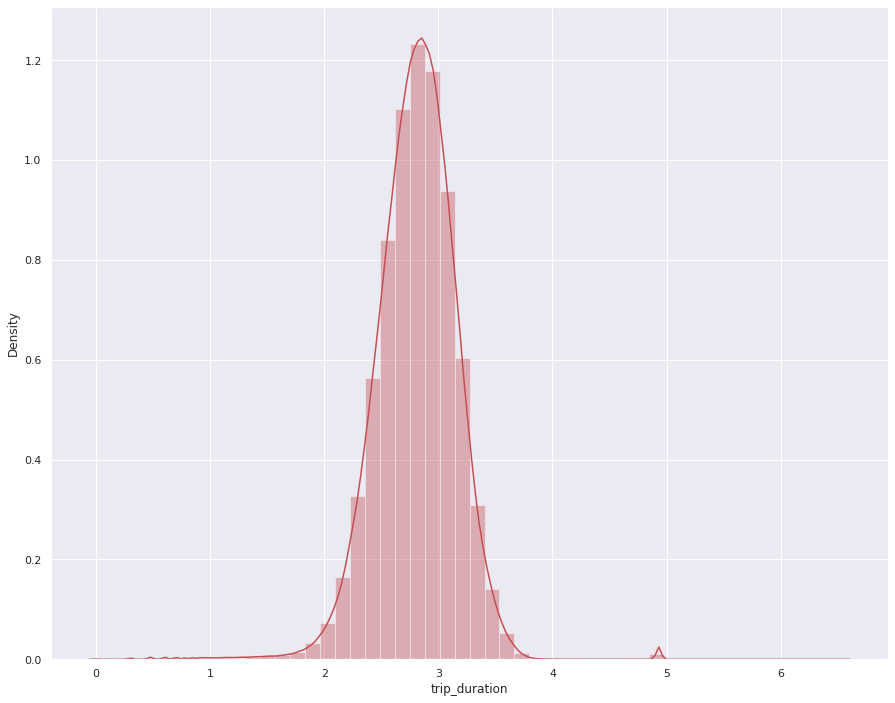

In [334]:
plt.figure(figsize=(15,12))
sns.distplot(np.log10(taxi_df['trip_duration']),color='R')

**klib** library gives us short intution about the the data distribution so make all other plot for the features with a log function for normal distribution

In [335]:
numeric_feature=taxi_df.describe().columns
numeric_feature

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

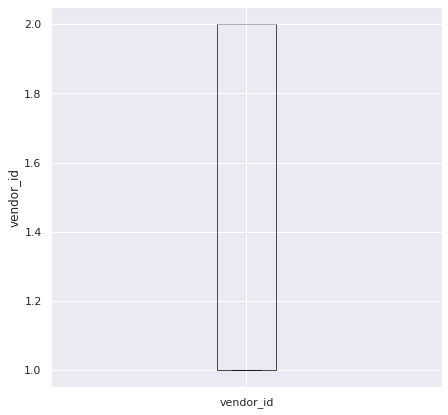

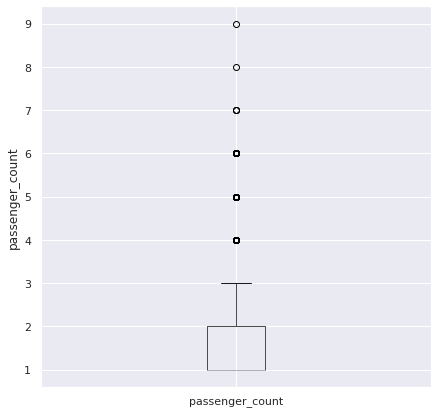

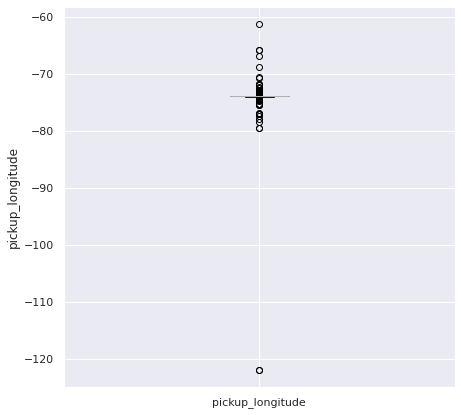

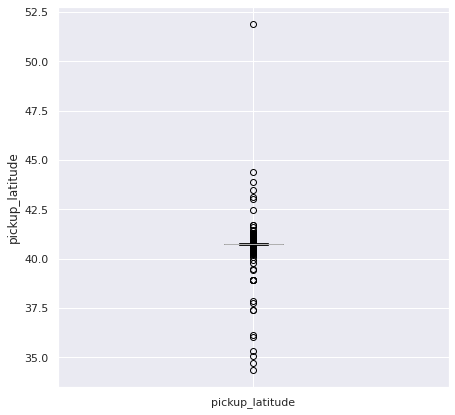

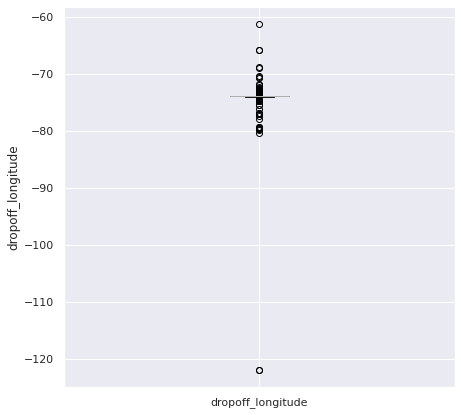

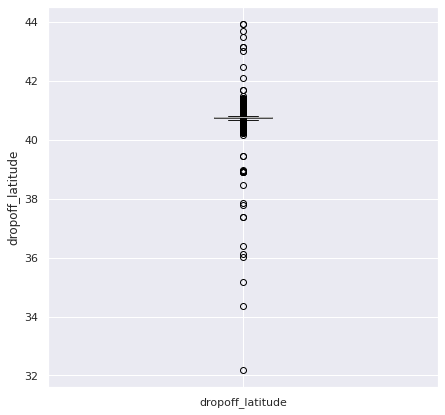

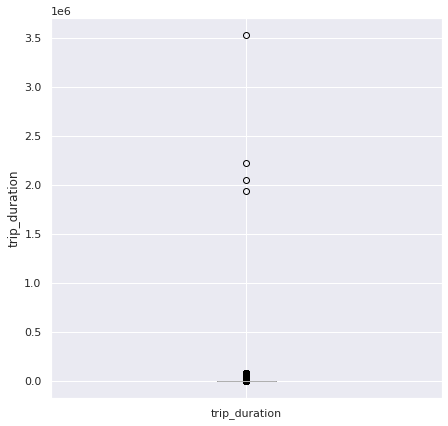

In [336]:
# for all feature distribution bar plot with log
for col in numeric_feature:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  taxi_df.boxplot(column= col, ax=ax)
  ax.set_ylabel(col)
plt.show()

 Ok what information from the box plot gives:-

* vender id have no outlier
* pessanger count more then 4 consider as outlier so we need to remove it from the analysis
* pickup time and dropoff time also have outlier
* pickup logitude and latitutde also have outlier 
* trip duration which is our target variable have larger value of outlier

so what we need for the further analysis is to remove out the outlier for reading data in a precise manner .

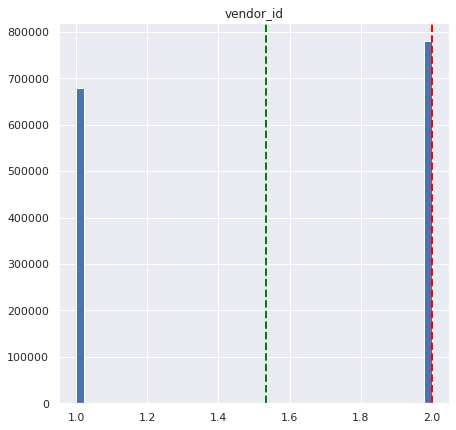

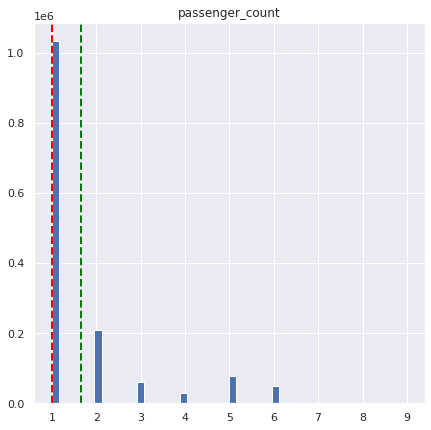

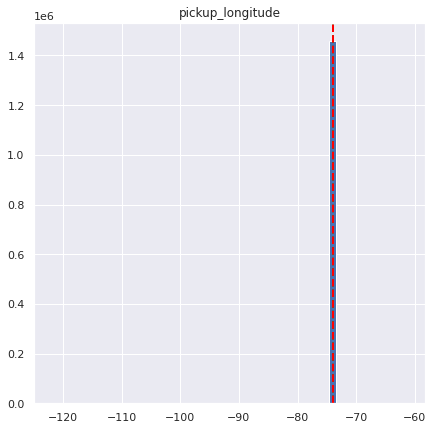

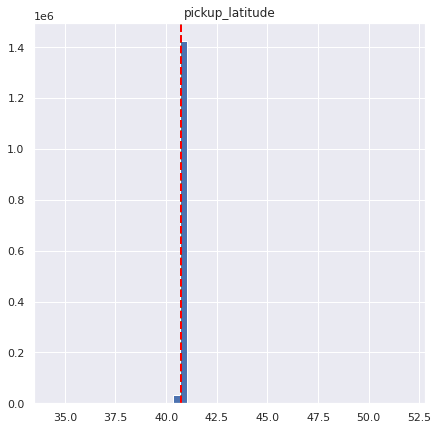

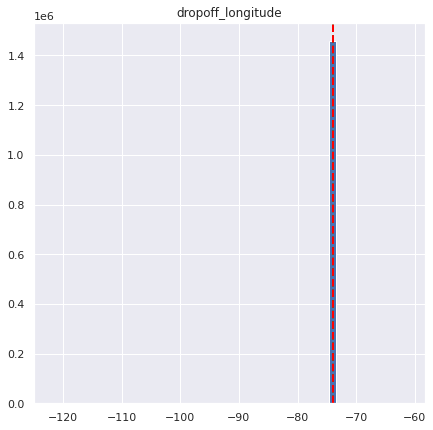

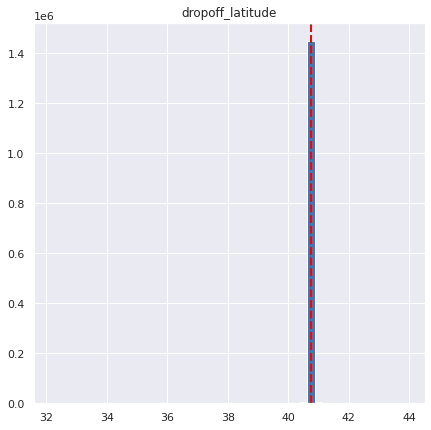

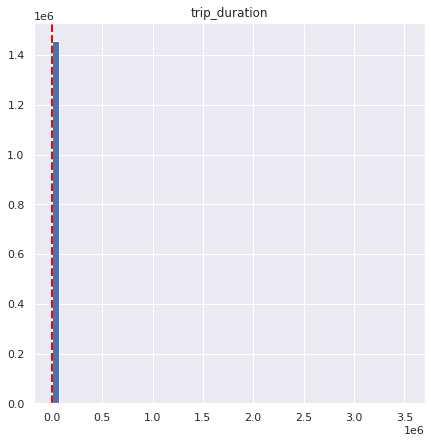

In [337]:
# we also plot a bar plot for more study on data
for col in numeric_feature:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  feature=taxi_df[col]
  feature.hist(bins=50,ax =ax)
  ax.axvline(feature.mean(),color='green',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='red',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()  


outputs from the histogram plot of all the features 
* for pessanger count the mean value lie between 1 and 2 and median moves towards 1

not more usefull results from these plot so let's move for next plot

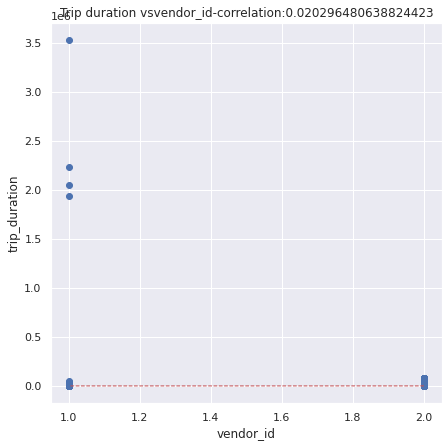

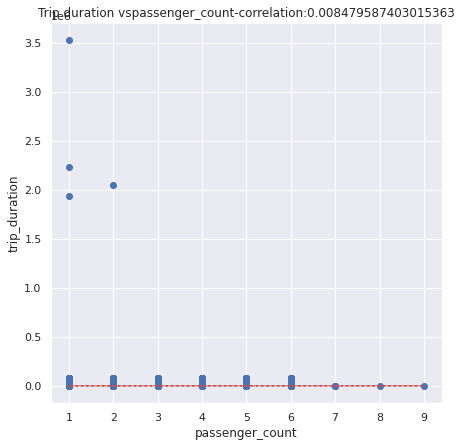

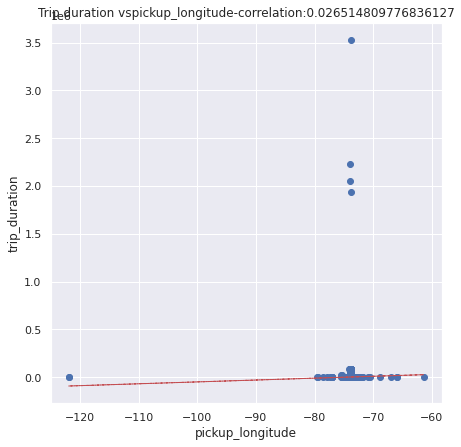

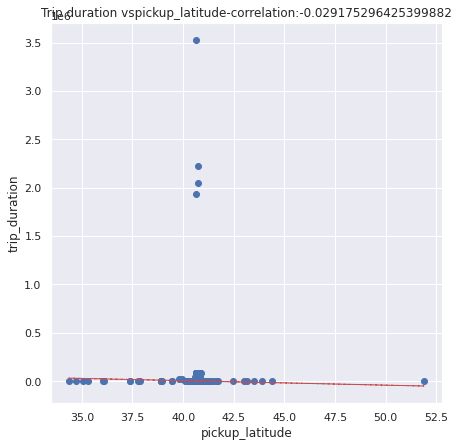

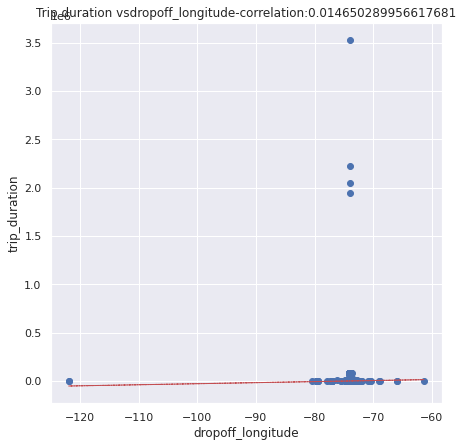

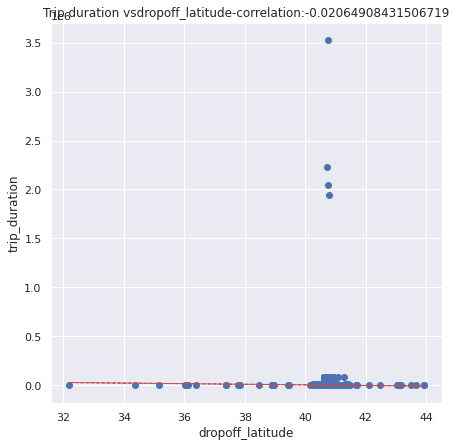

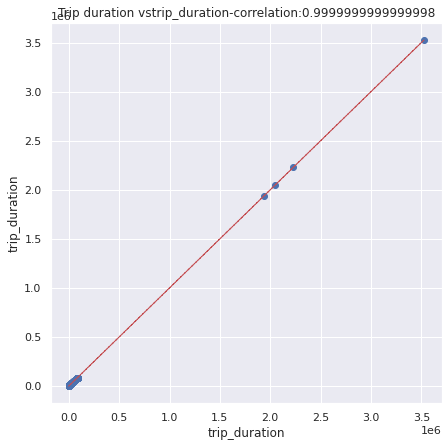

In [338]:
#scatter plot for the relation between feature
for col in numeric_feature:
  fig=plt.figure(figsize=(7,7))
  ax=fig.gca()
  label=taxi_df['trip_duration']
  feature=taxi_df[col]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('trip_duration')
  ax.set_title('Trip duration vs' + col + '-correlation:'+ str(correlation))
  z=np.polyfit(taxi_df[col], taxi_df['trip_duration'], 1)
  y_het=np.poly1d(z)(taxi_df[col])
  plt.plot(taxi_df[col],y_het,"r--",lw=1)
plt.show()  


solved or predict the multicolinearity

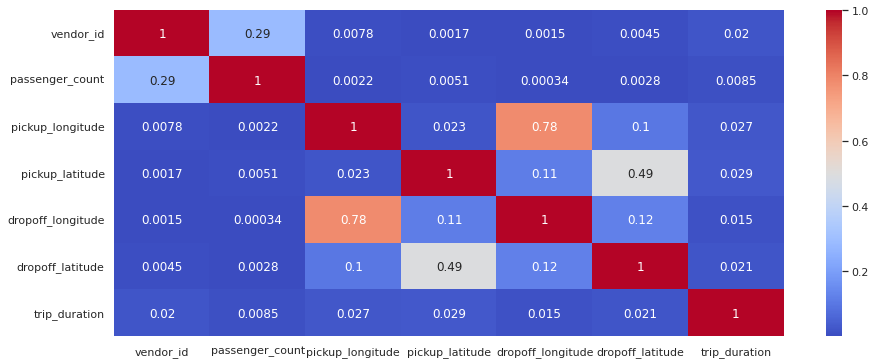

In [339]:
#correlation
plt.figure(figsize=(15,6))
correlation=taxi_df.corr()
sns.heatmap(abs(correlation),annot=True,cmap="coolwarm")

we can say that pickup logitude and latitutde and dropoff longitude and latitude have correlation to each other

Text(0.5, 1.0, 'dropoff_location')

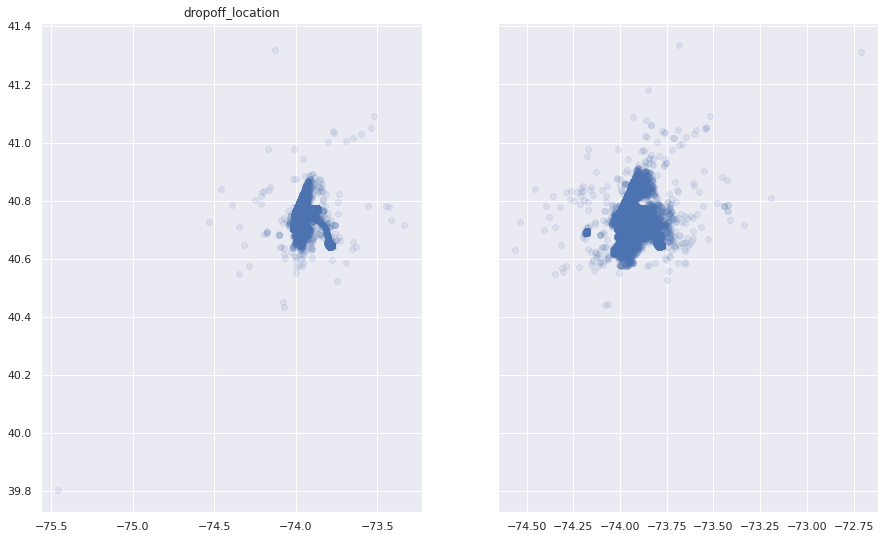

In [340]:
#scatter plot for get more information about the logitude nad latitude
n=120000
f, (ax1,ax2)=plt.subplots(1,2, sharey=True,figsize=(15,9))
ax1.scatter(taxi_df.pickup_longitude[:n],taxi_df.pickup_latitude[:n],alpha=0.1)
ax1.set_title('pickup_location')
ax2.scatter(taxi_df.dropoff_longitude[:n],taxi_df.dropoff_latitude[:n],alpha=0.1)
ax1.set_title('dropoff_location')

after Google the Newyork city map we find it has latitude 40.7141 and longitude-74.0016 so our rest of observation is bound between these value

 ** So here i will try to define a bounding box(log_max,log_min,latt_max,latti_min)using the minimum maximum coordinate**


In [341]:
#for longitude
print (min(taxi_df.pickup_longitude[:n].min(), taxi_df.dropoff_longitude[:n].min()))

-75.45591735839844


In [342]:
print (min(taxi_df.pickup_longitude[:n].min(), taxi_df.dropoff_longitude[:n].min()))

-75.45591735839844


In [343]:
print (max(taxi_df.pickup_longitude[:n].max(), taxi_df.dropoff_longitude[:n].max()))

-72.71139526367188


In [344]:
# for latitude
print (min(taxi_df.pickup_latitude[:n].min(), taxi_df.dropoff_latitude[:n].min()))

39.803932189941406


In [345]:
print (max(taxi_df.pickup_latitude[:n].max(), taxi_df.dropoff_latitude[:n].max()))

41.334739685058594


In [346]:
BB=(-75.4559,-72.7113,39.8039,41.3347)


In [347]:
# creat a funciton for bounbox of the range
def within_boundingbox(taxi_df,BB):
   return ((taxi_df['pickup_longitude'] >= BB[0]) & (taxi_df['pickup_longitude'] <=BB[1]) & 
            (taxi_df['pickup_latitude']>= BB[2]) & (taxi_df['pickup_latitude'] <= BB[3]) &
            (taxi_df['dropoff_longitude'] >= BB[0]) & (taxi_df['dropoff_longitude'] <= BB[1]) &
             (taxi_df['dropoff_latitude'] >= BB[2]) & (taxi_df['dropoff_latitude'] <= BB[3]))


In [348]:
#return boolean
taxi_df=taxi_df[within_boundingbox(taxi_df,BB)]

In [349]:
print("newsize  {} " .format(len(taxi_df)))

newsize  1458537 


In [350]:
#map for the plot
NYC_map = plt.imread('/content/drive/MyDrive/2-CAPSTON PROJECT SUPERWISED ML REGRESSION/New-York-City-Map-New-York-1265x964.jpg')
NYC_map.shape

(964, 1265, 3)

In [351]:
# function for the plot on map
def plot_on_map(taxi_df,BB,NYC_map,s=10,alpha=0.2):
  fig,axs = plt.subplots(1,2,figsize=(15,8))
  axs[0].scatter(taxi_df["pickup_longitude"],taxi_df["pickup_latitude"], alpha = alpha, c='g', s=s)
  axs[0].set_xlim((BB[0], BB[1]))
  axs[0].set_ylim((BB[2], BB[3]))
  axs[0].set_title('Pickup Locations')
  axs[0].imshow(NYC_map, extent=BB)
  axs[1].scatter(taxi_df['dropoff_longitude'],taxi_df['dropoff_latitude'], alpha = alpha, c='r', s=s)
  axs[1].set_xlim((BB[0], BB[1]))
  axs[1].set_ylim((BB[2], BB[3]))
  axs[1].set_title('Dropoff Locations')
  axs[1].imshow(NYC_map, extent=BB)



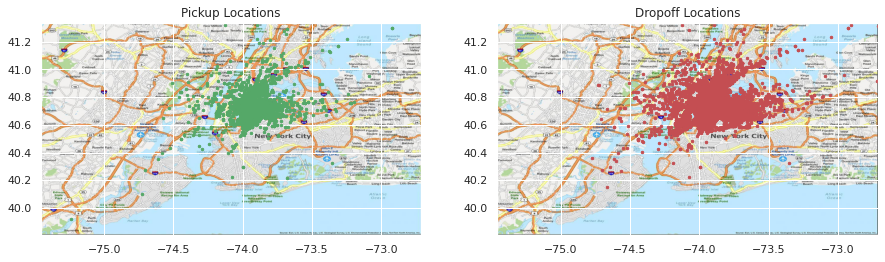

In [352]:
plot_on_map(taxi_df, BB , NYC_map , s=6 , alpha=1)

In [353]:
import folium
f= folium.Figure(width=1200,height=300)
mapa =folium.Map(location= (39.7679, -75.4592), zoom_start=11).add_to(f)

for index, row in taxi_df.sample(1000).iterrows():
    folium.Marker([row['pickup_latitude'],row['pickup_longitude']],icon=folium.Icon(color='green')).add_to(mapa)
    folium.Marker([row['dropoff_latitude'],row['dropoff_longitude']],icon=folium.Icon(color='purple')).add_to(mapa)
display(mapa)

# Feature Engineering

In [354]:
taxi_df['pickup_day']=taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day']=taxi_df['dropoff_datetime'].dt.day_name()
taxi_df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


now make plot for the data and also find the most busy day for the ttaxi drivers


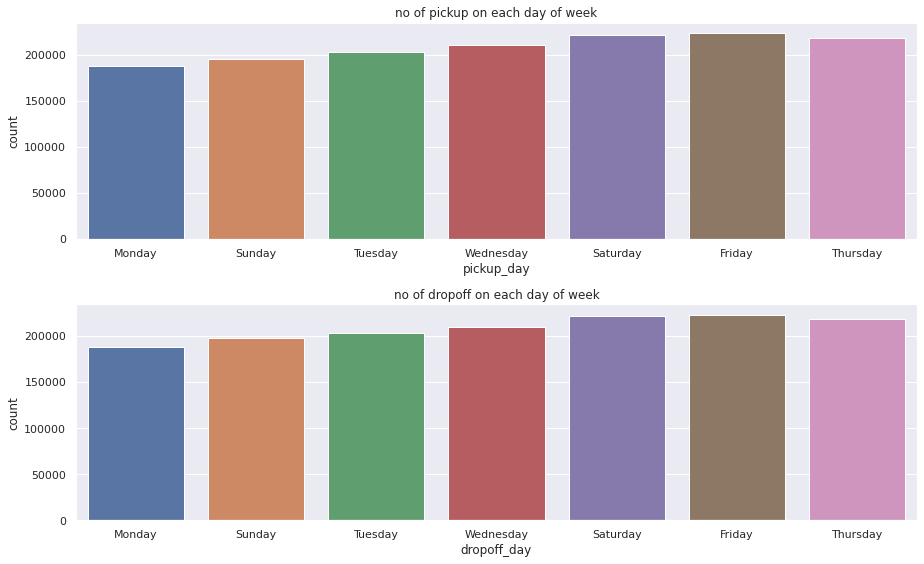

In [355]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(13,8))
sns.countplot(x='pickup_day',data=taxi_df,ax=ax[0])
ax[0].set_title('no of pickup on each day of week')
sns.countplot(x='dropoff_day',data=taxi_df,ax=ax[1])
ax[1].set_title('no of dropoff on each day of week')
plt.tight_layout()

what i see is **saturday** and **friday** is the most  busy day for taxi driver and **monday** is the least busy. .

now also take a look for the time of busyness 

here i use three time zone:-

**Morning**(4hr TO 10hr)

**Afternoon**(10 hr TO 16hr)

**Evening**(16hr TO 22hr)

**Latenight**(22hr TO 4hr)

In [356]:
bins=np.array([0,1800,3600,5400,7200,90000])
taxi_df['time_duration']=pd.cut(taxi_df.trip_duration,bins,labels=["<5","5-10","10-15","15-22",">22"])
taxi_df['time_duration']


0            <5
1            <5
2          5-10
3            <5
4            <5
           ... 
1458639      <5
1458640      <5
1458641      <5
1458642      <5
1458643      <5
Name: time_duration, Length: 1458537, dtype: category
Categories (5, object): ['<5' < '5-10' < '10-15' < '15-22' < '>22']

Now distribute this time zone bins as per deccided day 

In [357]:
import datetime
def daytimezone(x):
  if (x>=datetime.time(4,0,1) and x<=datetime.time(10,0,0)):
    return "Morning"
  elif (x>=datetime.time(10,0,1) and x<=datetime.time(16,0,0)):
    return "Afternoon"
  elif (x>=datetime.time(16,0,1) and x<=datetime.time(22,0,0)):
    return "Evening"
  else :
     return "Latenight"       

In [358]:
#function call finding the day from the time zone
taxi_df['pickup_timezone']=taxi_df['pickup_datetime'].apply(lambda x :daytimezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
taxi_df['dropoff_timezone']=taxi_df['dropoff_datetime'].apply(lambda x :daytimezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


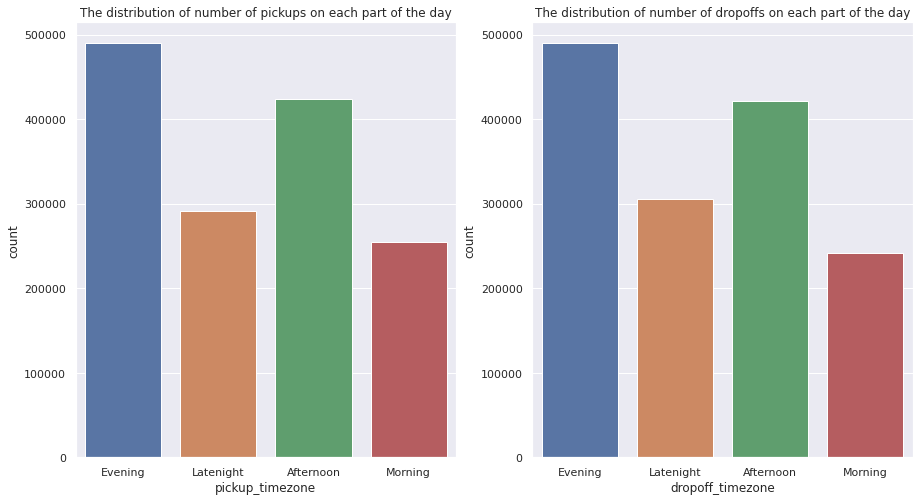

In [359]:
# plot for the  busy time of the day for taxi 
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(x='pickup_timezone',data=taxi_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=taxi_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

beautiful results from the plot that is Evening time is most bussy for the drivers. 

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

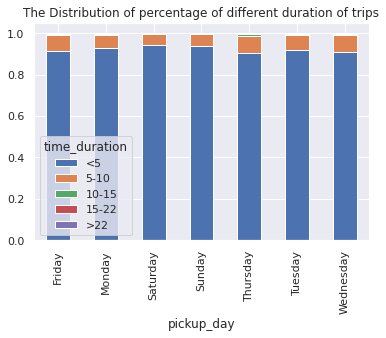

In [360]:
ax1=taxi_df.groupby('pickup_day')["time_duration"].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

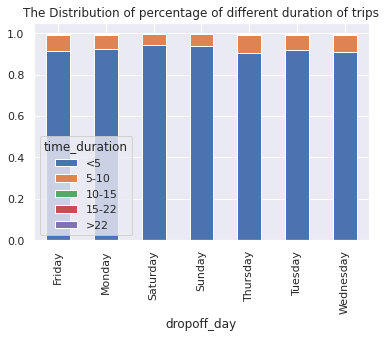

In [361]:
ax2=taxi_df.groupby('dropoff_day')["time_duration"].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

I extract lot of informatin from the time zone and day of the week for the taxi busyness.not it's time to set and extract the relation between the longitude and latitude in term or distance .because these have collinearity 

** Reduse the multicollinearity** and creat the a column of distance from the longitude and latitude which required some complicated operation respect to longitude nad latitude

In [362]:
from math import  sin,cos,sqrt,atan2,radians
def distance_calculator(lon_1,lon_2,lati_1,lati_2):
  ''' this function is used to calculating the distance form the longitude and latitude'''
  R=6400
  log1r=radians(lon_1)
  lat1r=radians(lati_1)
  log2r=radians(lon_2)
  lat2r=radians(lati_2)
  diffrence_long=log2r-log1r
  diffrence_lati=lat2r-lat1r
  a = sin(diffrence_lati/ 2)**2 + cos(lat1r) * cos(lat2r) * sin(diffrence_long / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))
  distance=R*c
  return distance  

In [363]:
taxi_df['distance']=taxi_df.apply(lambda x:distance_calculator(x['pickup_longitude'],x['dropoff_longitude'],x['pickup_latitude'],x['dropoff_latitude']),axis=1)


In [ ]:
taxi_df['distance']

**Dealing with outlier**

IQR=Q3-Q1

Lower_limit_outlier=Q1-1.5*IQR

Upper_limit_outlier=Q3+1.5*IQR


In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot for the distance")
ax=sns.boxplot(data=taxi_df['distance'],orient="v")

In [ ]:
pctl_q1=np.percentile(taxi_df["distance"],25)
print(pctl_q1)
pctl_q2=np.percentile(taxi_df["distance"],50)
print(pctl_q2)
pctl_q3=np.percentile(taxi_df["distance"],75)
print(pctl_q3)

In [ ]:
IQR=pctl_q3-pctl_q1
Lower_limit_outlier=pctl_q1-1.5*IQR
Upper_limit_outlier=pctl_q3+1.5*IQR

In [ ]:
print('lower limit of outlier:' , Lower_limit_outlier)
print('Upper limit of outlier:' , Upper_limit_outlier)

In [369]:
taxi_df=taxi_df[taxi_df["distance"]>Lower_limit_outlier]
taxi_df=taxi_df[taxi_df["distance"]<Upper_limit_outlier]


In [370]:
taxi_df.shape

(1317888, 17)

you can observe the row reduction due to treatment of distance outlier

Remove the outlier from the trip duration

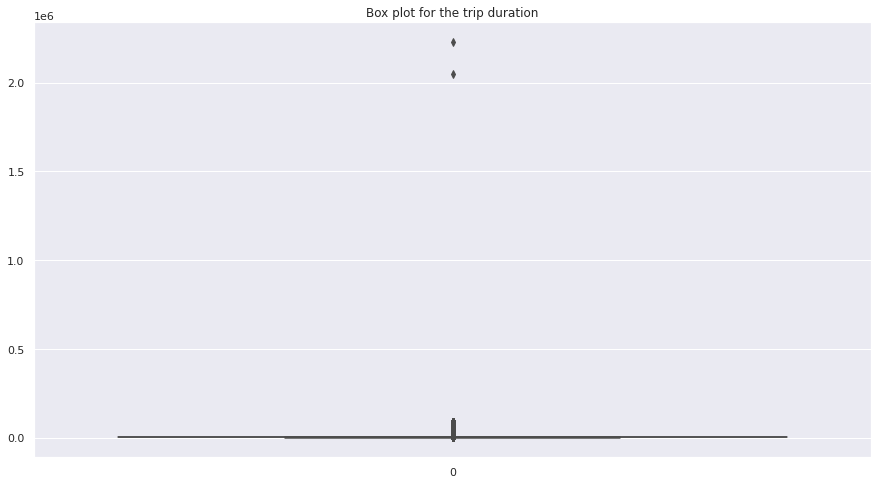

In [371]:
plt.figure(figsize=(15,8))
plt.title("Box plot for the trip duration")
ax=sns.boxplot(data=taxi_df['trip_duration'],orient="v")

In [372]:
pctl_trip_q1=np.percentile(taxi_df["trip_duration"],25)
print(pctl_trip_q1)
pctl_trip_q2=np.percentile(taxi_df["trip_duration"],50)
print(pctl_trip_q2)
pctl_trip_q3=np.percentile(taxi_df["trip_duration"],75)
print(pctl_trip_q3)

373.0
605.0
931.0


In [373]:
IQR=pctl_trip_q3-pctl_trip_q1
Lower_limit_outlier_trip=pctl_trip_q1-1.5*IQR
Upper_limit_outlier_trip=pctl_trip_q3+1.5*IQR

In [374]:
print('lower limit of outlier:' , Lower_limit_outlier_trip)
print('Upper limit of outlier:' , Upper_limit_outlier_trip)

lower limit of outlier: -464.0
Upper limit of outlier: 1768.0


In [375]:
taxi_df=taxi_df[taxi_df["trip_duration"]>0]
taxi_df=taxi_df[taxi_df["trip_duration"]<Upper_limit_outlier_trip]


In [376]:
taxi_df.shape

(1277317, 17)

reduce no of row shows removal of trip duration  outlier from the data

Now remove the outlier from the passenger count

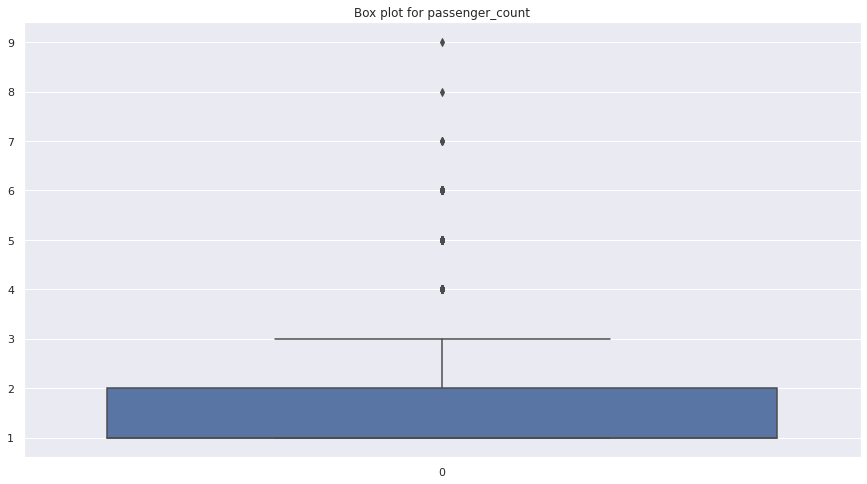

In [377]:
plt.figure(figsize=(15,8))
plt.title("Box plot for passenger_count")
ax=sns.boxplot(data=taxi_df['passenger_count'],orient="v")

In [378]:
pctl_passcount_q1=np.percentile(taxi_df["passenger_count"],25)
print(pctl_passcount_q1)
pctl_passcount_q2=np.percentile(taxi_df["passenger_count"],50)
print(pctl_passcount_q2)
pctl_passcount_q3=np.percentile(taxi_df["passenger_count"],75)
print(pctl_passcount_q3)

1.0
1.0
2.0


In [379]:
IQR=pctl_passcount_q3-pctl_passcount_q1
Lower_limit_outlier_passcount=pctl_passcount_q1-1.5*IQR
Upper_limit_outlier_passcount=pctl_passcount_q3+1.5*IQR

In [380]:
print('lower limit of outlier:' , Lower_limit_outlier_passcount)
print('Upper limit of outlier:' , Upper_limit_outlier_passcount)

lower limit of outlier: -0.5
Upper limit of outlier: 3.5


In [381]:
taxi_df=taxi_df[taxi_df["passenger_count"]>0]
taxi_df=taxi_df[taxi_df["passenger_count"]<Upper_limit_outlier]

In [382]:
taxi_df.shape

(1277315, 17)

In [383]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,time_duration,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,<5,Evening,Evening,1.505342
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,<5,Latenight,Latenight,1.813726
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,<5,Evening,Evening,1.492260
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,<5,Afternoon,Afternoon,1.193999
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,Saturday,Saturday,<5,Latenight,Latenight,1.103945


Extract year ,month,day and time from the datetime formate.